In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
from cassie import CassieEnv, MyCallbacks
import constants as c 
import functions as f 
import numpy as np
import loader as l 
import caps as cp 
import torch
from ray.tune.registry import register_env

import mediapy as media 

DEBUG:matplotlib:matplotlib data path: c:\Users\Ajvendetta\miniconda3\lib\site-packages\matplotlib\mpl-data
DEBUG:matplotlib:CONFIGDIR=C:\Users\Ajvendetta\.matplotlib
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is win32


Device is  cuda


In [1]:
import torch 
torch.cuda.is_available()

True

In [3]:
cassie = CassieEnv({})

In [9]:
cassie.reset()


(array([ 0.40109956,  0.49568141,  0.38518656,  0.87809249,  1.27466834,
         0.50012992, -0.40819531,  1.27276609,  0.60558646,  0.5006132 ,
         0.38483484,  1.19216875,  1.26941491,  0.5000296 , -0.40828821,
         1.27266103,  0.50008177,  0.49994882,  0.49990362,  0.99993919,
         0.00298096, -0.00949716, -0.00474756,  0.        ,  1.        ]),
 {})

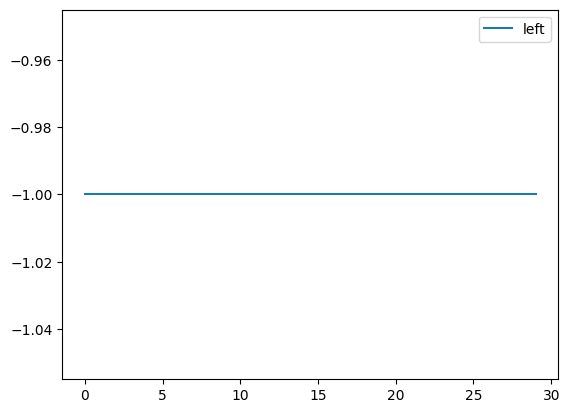

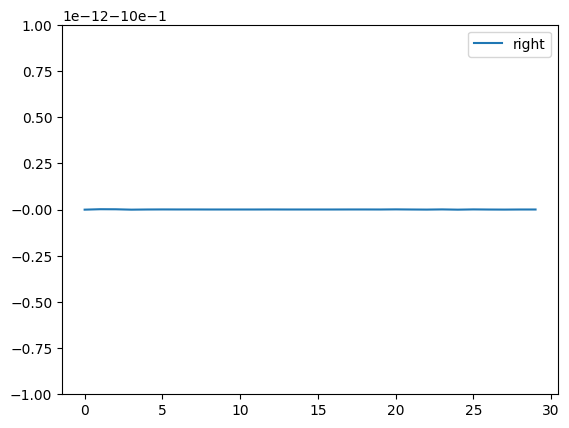

In [27]:
cs = {k: [] for k in cassie.C.keys()}
for i in range(30):
    cassie.step(cassie.action_space.sample())
    for k in cassie.C.keys():
        cs[k].append(cassie.C[k])
for k in cassie.C.keys():
    cs[k] = np.array(cs[k])
import matplotlib.pyplot as plt
plt.plot(cs['C_frc_left'] + cs['C_spd_left'], label='left')
plt.legend()
plt.show()
plt.plot(cs['C_frc_right'] + cs['C_spd_right'], label='right')
plt.legend()
plt.show()

In [13]:
cassie.reset()
import mujoco
model = cassie.model
model.ngeom

50

In [14]:
model.geom_rgba

array([[0.5, 0.5, 0.5, 1. ],
       [0.5, 0.5, 0.5, 1. ],
       [0.5, 0.5, 0.5, 1. ],
       [0.5, 0.5, 0.5, 1. ],
       [0.5, 0.5, 0.5, 1. ],
       [0.5, 0.5, 0.5, 1. ],
       [0.5, 0.5, 0.5, 1. ],
       [0.5, 0.5, 0.5, 1. ],
       [0.5, 0.5, 0.5, 1. ],
       [0.5, 0.5, 0.5, 1. ],
       [0.5, 0.5, 0.5, 1. ],
       [0.5, 0.5, 0.5, 1. ],
       [0.5, 0.5, 0.5, 1. ],
       [0.5, 0.5, 0.5, 1. ],
       [0.5, 0.5, 0.5, 1. ],
       [0.5, 0.5, 0.5, 1. ],
       [0.5, 0.5, 0.5, 1. ],
       [0.5, 0.5, 0.5, 1. ],
       [0.5, 0.5, 0.5, 1. ],
       [0.5, 0.5, 0.5, 1. ],
       [0.5, 0.5, 0.5, 1. ],
       [0.5, 0.5, 0.5, 1. ],
       [0.5, 0.5, 0.5, 1. ],
       [0.5, 0.5, 0.5, 1. ],
       [0.5, 0.5, 0.5, 1. ],
       [0.5, 0.5, 0.5, 1. ],
       [0.5, 0.5, 0.5, 1. ],
       [0.5, 0.5, 0.5, 1. ],
       [0.5, 0.5, 0.5, 1. ],
       [0.5, 0.5, 0.5, 1. ],
       [0.5, 0.5, 0.5, 1. ],
       [0.5, 0.5, 0.5, 1. ],
       [0.5, 0.5, 0.5, 1. ],
       [0.5, 0.5, 0.5, 1. ],
       [0.5, 0

In [15]:
data = mujoco.MjData(model)

In [16]:
cassie.render_mode = "rgb_array"

In [24]:
cassie.reset()

(array([ 4.00785394e-01,  5.03880015e-01,  3.85379031e-01,  8.78174766e-01,
         1.27041649e+00,  5.00082507e-01, -4.08247256e-01,  1.27268106e+00,
         6.03662361e-01,  5.01503244e-01,  3.83590530e-01,  1.19364248e+00,
         1.27053707e+00,  4.99906444e-01, -4.08194254e-01,  1.27268347e+00,
         5.00068339e-01,  4.99924009e-01,  5.00133056e-01,  9.99988782e-01,
         1.76991784e-03,  4.32445033e-03, -7.76136100e-04,  0.00000000e+00,
         1.00000000e+00]),
 {})

In [25]:
cassie.phi

0

[0.16796181 0.15997256]
-0.0003454716482006303


""

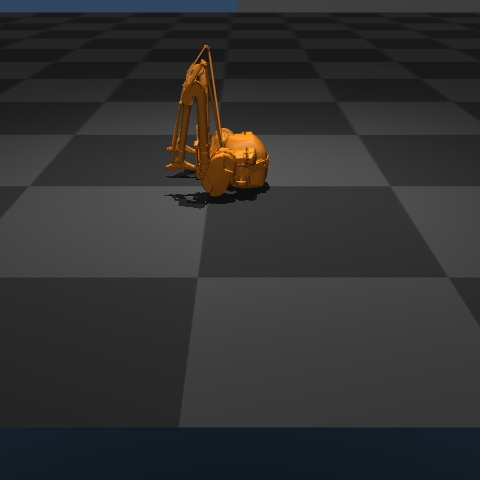

In [93]:

cassie.step(np.zeros(10))
print(cassie.data.geom_xpos[-2:,2])
print(cassie.data.geom_xpos[16,1])
media.show_image(cassie.render())
# print(cassie.data.geom_xpos[16:])
# print(cassie.data.geom_xpos[16+16,:])

# print(cassie.data.geom_xpos[16+17,:])
# # #find the feet by looking at the z position and getting the lowest two :



In [60]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [61]:
device

device(type='cuda')

In [62]:

logdir = "./logs"
simdir = "./sims"
loader = l.Loader(logdir, simdir)
fps = 40

In [63]:
#load a cassie checkpoint 
config = "testing_configs.yaml"
loader = l.Loader()
config = loader.load_config(config)
Trainer = PPOTrainer
splitted = loader.split_config(config)
combined = {
    **splitted.get("environment", {}),
    **splitted.get("rollouts", {}),
    **splitted.get("checkpointing", {}),
    **splitted.get("debugging", {}),
    **splitted.get("training", {}),
    **splitted.get("framework", {}),
    **splitted.get("resources", {}),
    **splitted.get("evaluation", {}),
}
combined["callbacks"] = MyCallbacks
trainer = Trainer(config=combined, env="cassie-v0")


2023-04-29 09:24:20,150	WARNING algorithm_config.py:596 -- Cannot create PPOConfig from given `config_dict`! Property enable_eager_tracing not supported.
2023-04-29 09:24:20,150	WARNING deprecation.py:50 -- DeprecationWarning: `algo = Algorithm(env='cassie-v0', ...)` has been deprecated. Use `algo = AlgorithmConfig().environment('cassie-v0').build()` instead. This will raise an error in the future!
2023-04-29 09:24:20,186	INFO algorithm.py:506 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.


{'training': {'gamma': 0.99, 'lr': 0.001, 'train_batch_size': 15000, 'model': {'fcnet_hiddens': [128, 128], 'fcnet_activation': 'swish', 'vf_share_layers': False, 'free_log_std': True}, 'optimizer': {'type': 'adam'}, 'use_critic': True, 'use_gae': True, 'lambda_': 0.95, 'kl_coeff': 0.2, 'sgd_minibatch_size': 5000, 'num_sgd_iter': 3, 'shuffle_sequences': True, 'vf_loss_coeff': 0.5, 'entropy_coeff': 0.01, 'clip_param': 0.3, 'vf_clip_param': 1000, 'grad_clip': 100, 'kl_target': 0.01}, 'environment': {'env': 'cassie-v0', 'disable_env_checking': True, 'clip_actions': True}, 'framework': {'framework': 'torch', 'enable_eager_tracing': True}, 'rollouts': {'num_rollout_workers': 1, 'num_envs_per_worker': 1, 'rollout_fragment_length': 'auto', 'batch_mode': 'truncate_episodes', 'recreate_failed_workers': True, 'observation_filter': 'MeanStdFilter', 'compress_observations': True}, 'evaluation': {'evaluation_interval': 2, 'evaluation_duration': 10}, 'checkpointing': {'export_native_model_files': Tr

2023-04-29 09:24:22,746	INFO worker.py:1553 -- Started a local Ray instance.
2023-04-29 09:24:32,667	ERROR actor_manager.py:496 -- Ray error, taking actor 1 out of service. The actor died because of an error raised in its creation task, ray::RolloutWorker.__init__() (pid=24100, ip=127.0.0.1, repr=<ray.rllib.evaluation.rollout_worker.RolloutWorker object at 0x00000223581120E0>)
  File "c:\Users\Ajvendetta\miniconda3\lib\site-packages\gymnasium\envs\registration.py", line 569, in make
    _check_version_exists(ns, name, version)
  File "c:\Users\Ajvendetta\miniconda3\lib\site-packages\gymnasium\envs\registration.py", line 219, in _check_version_exists
    _check_name_exists(ns, name)
  File "c:\Users\Ajvendetta\miniconda3\lib\site-packages\gymnasium\envs\registration.py", line 197, in _check_name_exists
    raise error.NameNotFound(
gymnasium.error.NameNotFound: Environment cassie doesn't exist. 

During handling of the above exception, another exception occurred:

ray::RolloutWorker.__i

EnvError: The env string you provided ('cassie-v0') is:
a) Not a supported/installed environment.
b) Not a tune-registered environment creator.
c) Not a valid env class string.

Try one of the following:
a) For Atari support: `pip install gym[atari] autorom[accept-rom-license]`.
   For VizDoom support: Install VizDoom
   (https://github.com/mwydmuch/ViZDoom/blob/master/doc/Building.md) and
   `pip install vizdoomgym`.
   For PyBullet support: `pip install pybullet`.
b) To register your custom env, do `from ray import tune;
   tune.register('[name]', lambda cfg: [return env obj from here using cfg])`.
   Then in your config, do `config['env'] = [name]`.
c) Make sure you provide a fully qualified classpath, e.g.:
   `ray.rllib.examples.env.repeat_after_me_env.RepeatAfterMeEnv`


In [ ]:
trainer.load_checkpoint("./checkpoints/checkpoint_000925")

Device is  cuda


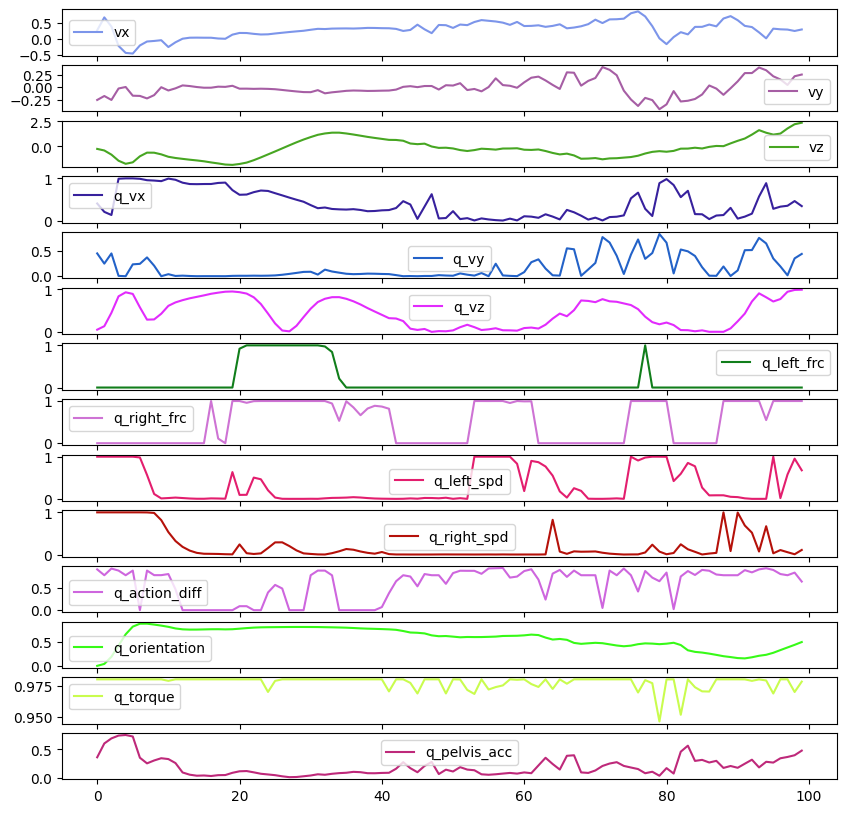

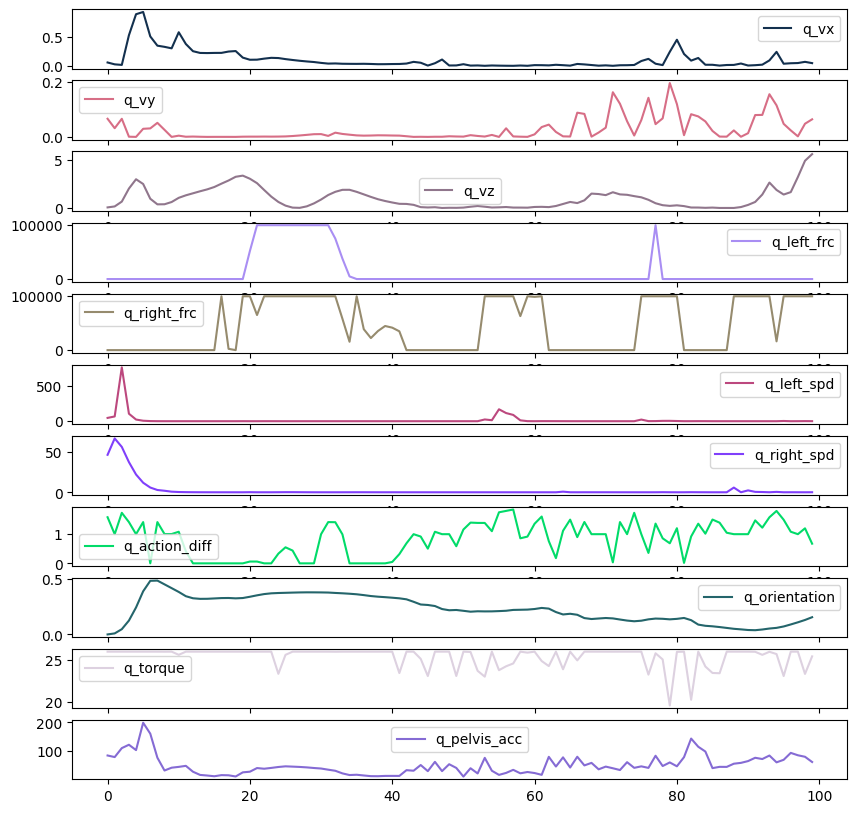

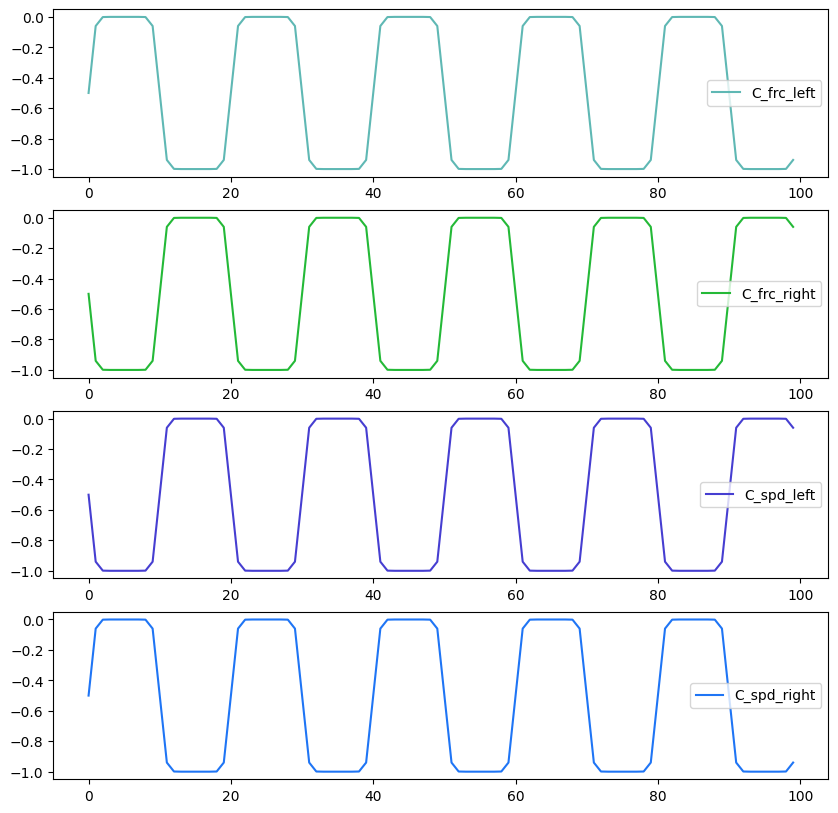

In [ ]:
#show a video of 100steps of the environment and register some metrics 
env = CassieEnv({})
obs,_ = env.reset()
env.render_mode = "rgb_array"
metrics = {}
frames = []
metrics["vx"] = []
metrics["vy"] = []
metrics["vz"] = []
filterfn = trainer.workers.local_worker().filters["default_policy"]
C = {}
exponents = {}
max_steps = 100
number_of_rounds = 4
for i in range(max_steps):
    obs = filterfn(obs)
    action = trainer.compute_single_action(obs)
    obs, reward, terminated, _, _ = env.step(action)
    frames.append(env.render())
    metrics["vz"] .append( env.data.qvel[2])
    metrics["vx"] .append( env.data.qvel[0])
    metrics["vy"] .append( env.data.qvel[1])
    for exponent, value in env.exponents.items():
        if exponent not in exponents.keys():
            exponents[exponent] = [value]
        else:
            exponents[exponent].append(value)
    for metric,value in env.used_quantities.items():
        if metric not in metrics.keys():
            metrics[metric] = [value]
        else:
            metrics[metric].append(value)

    for key,value in env.C.items():
        if key not in C.keys():
            C[key] = [value]
        else:
            C[key].append(value)

env.close()
#save video 
media.show_video( frames, fps=fps)
#plot the metrics stacked in a vertical way in multiple subplots
import matplotlib.pyplot as plt
fig, axs = plt.subplots(len(metrics.keys()), 1, figsize=(10, 10))
for i, metric in enumerate(metrics.keys()):
    #choose a random color for the plot 
    s = np.random.rand(3,)

    axs[i].plot(metrics[metric], color=s)
    axs[i].legend([metric])

plt.show()


#do the same thing for the exponents
fig, axs = plt.subplots(len(exponents.keys()), 1, figsize=(10, 10))
for i, metric in enumerate(exponents.keys()):
    #choose a random color for the plot 
    s = np.random.rand(3,)

    axs[i].plot(np.clip(exponents[metric],0,100000), color=s)
    axs[i].legend([metric])

plt.show()

#do the same for C 
fig, axs = plt.subplots(len(C.keys()), 1, figsize=(10, 10))
for i, metric in enumerate(C.keys()):
    #choose a random color for the plot 
    s = np.random.rand(3,)

    axs[i].plot(C[metric], color=s)
    axs[i].legend([metric])

In [ ]:
train_batch = {'obs': [], 'actions': []}
for i in range(2):
    obs, reward, done,_, info = env.step(env.action_space.sample())
    train_batch['obs'].append(obs)
    train_batch['actions'].append(env.action_space.sample())
    if done:
        env.reset()

train_batch['obs'] = np.array(train_batch['obs'])
train_batch['actions'] = np.array(train_batch['actions'])


In [ ]:
train_batch['obs'][0]

array([ 0.22756312,  0.72992185,  0.27532736,  0.86390352,  1.02768033,
        0.50020233, -0.40974382,  1.26782633,  0.77014666,  0.73155939,
        0.56218056,  1.22051776,  1.07283313,  0.50221607, -0.41131564,
        1.26872939,  0.50949996,  0.44740234,  0.52667562,  0.25587063,
        0.11545418, -0.87278649,  0.39930476,  0.8660254 , -0.5       ])

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
model = nn.Sequential(
nn.Linear(25, 10),
nn.ReLU(),
nn.Linear(10, 10),
nn.ReLU(),
nn.Linear(10, 10),
nn.Sigmoid()
).to(device)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters())

print(model)


Sequential(
  (0): Linear(in_features=25, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=10, bias=True)
  (5): Sigmoid()
)


In [ ]:
torch.tensor(c.act_ranges[:,1]-c.act_ranges[:,0])

C:\Users\Ajvendetta\AppData\Local\Temp\ipykernel_3912\2800571735.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(c.act_ranges[:,1]-c.act_ranges[:,0])


tensor([ 9.0000,  9.0000, 24.4000, 24.4000,  1.8000,  9.0000,  9.0000, 24.4000,
        24.4000,  1.8000])

In [ ]:
train_batch = {'obs': [], 'actions': []}
for i in range(2):
    obs, reward, done,_, info = env.step(env.action_space.sample())
    train_batch['obs'].append(obs)
    train_batch['actions'].append(env.action_space.sample())
    if done:
        env.reset()

train_batch['obs'] = torch.tensor(train_batch['obs']).float().to(device)
train_batch['actions'] = torch.tensor(train_batch['actions']).float().to(device)

loss = 0 
# get the observations and actions
obs, actions = train_batch["obs"], train_batch["actions"]

logits = model(obs)


#get a bunch of normal distribution around 
dist = torch.distributions.Normal(obs, 0.01 )

around_obs = dist.sample()
print(around_obs)
logits_around = model(around_obs)

print(logits)
print(logits_around)

L_S = torch.mean(torch.mean(torch.abs(logits-logits_around),axis=1))
L_T = torch.mean(torch.abs(actions[1:,:] - actions[:-1,:]))

print(1000*L_S)
print(L_T)
# add the loss of the state around the observations to the loss
loss += L_S
loss += L_T

# Backpropagate and update the model parameters
optimizer.zero_grad()
loss.backward()
optimizer.step()

print("Loss: ", loss.item())

C:\Users\Ajvendetta\AppData\Local\Temp\ipykernel_3912\3323351765.py:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:248.)
  train_batch['obs'] = torch.tensor(train_batch['obs']).float().to(device)


tensor([[ 0.4203,  0.5125,  0.3979,  0.8811,  1.2036,  0.5061, -0.4075,  1.2543,
          0.5926,  0.4977,  0.3993,  1.1655,  1.2089,  0.5018, -0.4460,  1.2699,
          0.4907,  0.3983,  0.5167,  0.9921,  0.0059, -0.0282,  0.0019,  0.2018,
          0.9843],
        [ 0.4598,  0.5424,  0.3936,  0.8964,  1.1077,  0.5013, -0.4058,  1.2669,
          0.5799,  0.4792,  0.3979,  1.1722,  1.1272,  0.5031, -0.3948,  1.2640,
          0.4779,  0.3912,  0.4953,  1.0044,  0.0210, -0.0612, -0.0065,  0.3997,
          0.9193]], device='cuda:0')
tensor([[0.5549, 0.5311, 0.5389, 0.5355, 0.5258, 0.5310, 0.5741, 0.4727, 0.5119,
         0.4963],
        [0.5548, 0.5331, 0.5392, 0.5371, 0.5253, 0.5292, 0.5748, 0.4746, 0.5143,
         0.4983]], device='cuda:0', grad_fn=<SigmoidBackward0>)
tensor([[0.5545, 0.5307, 0.5391, 0.5345, 0.5261, 0.5312, 0.5740, 0.4724, 0.5118,
         0.4959],
        [0.5551, 0.5329, 0.5390, 0.5373, 0.5255, 0.5296, 0.5750, 0.4745, 0.5140,
         0.4980]], device='cuda:0'

In [ ]:
loss

tensor(3.9854, device='cuda:0', grad_fn=<AddBackward0>)

In [ ]:
env.data.contact

<_MjContactList
  H: array([], shape=(0, 36), dtype=float64)
  dim: array([], dtype=int32)
  dist: array([], dtype=float64)
  efc_address: array([], dtype=int32)
  exclude: array([], dtype=int32)
  frame: array([], shape=(0, 9), dtype=float64)
  friction: array([], shape=(0, 5), dtype=float64)
  geom1: array([], dtype=int32)
  geom2: array([], dtype=int32)
  includemargin: array([], dtype=float64)
  mu: array([], dtype=float64)
  pos: array([], shape=(0, 3), dtype=float64)
  solimp: array([], shape=(0, 5), dtype=float64)
  solref: array([], shape=(0, 2), dtype=float64)
>

In [ ]:
import mujoco as m 

In [ ]:
contact_force_right_foot = np.zeros(6)
m.mj_contactForce(env.model, env.data, 0, contact_force_right_foot)
print(contact_force_right_foot)

[0. 0. 0. 0. 0. 0.]


In [ ]:
env.render_mode = 'rgb_array'

In [ ]:
right_forces = [    
]
left_forces = [
]

In [ ]:
env.reset()

(array([ 4.01280410e-01,  4.95784776e-01,  3.85028465e-01,  8.78653367e-01,
         1.27659698e+00,  4.99931941e-01, -4.08182144e-01,  1.27280467e+00,
         6.04778193e-01,  4.94681173e-01,  3.84745762e-01,  1.19331895e+00,
         1.26949481e+00,  4.99865279e-01, -4.08300190e-01,  1.27266262e+00,
         5.00015275e-01,  4.99942834e-01,  5.00089978e-01,  9.99990353e-01,
         1.23656309e-03, -3.72843736e-03,  1.96563135e-03,  0.00000000e+00,
         1.00000000e+00]),
 {})

In [ ]:
np.where(env.model.name_bodyadr == 7)

(array([0], dtype=int64),)

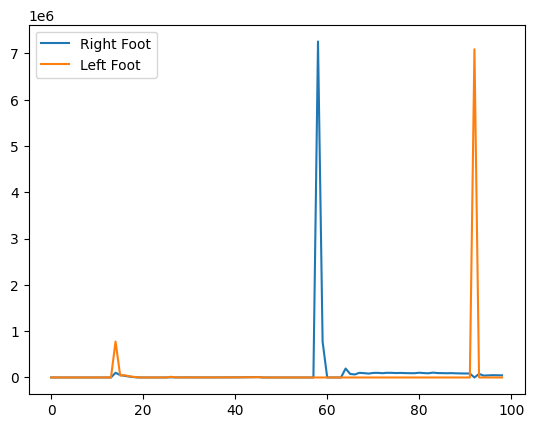

In [ ]:
env.reset()

contact_force_right_foot = np.zeros(6)
frames = []
for i in range(100):
    env.step(np.zeros(10))

    x = np.zeros(6)
    m.mj_contactForce(env.model, env.data, 0, x)
    right_forces.append(np.linalg.norm(x))
    x = np.zeros(6)
    m.mj_contactForce(env.model, env.data, 1, x)
    left_forces.append(np.linalg.norm(x))
    frames.append(env.render())
media.show_video(frames,fps = fps)

import matplotlib.pyplot as plt

#remove values that are extremely high
right_forces = [x**2 for x in right_forces if x < 4000]
left_forces = [x**2 for x in left_forces if x < 4000]

plt.plot(right_forces)
plt.plot(left_forces)
plt.legend(["Right Foot", "Left Foot"])
plt.show()

In [ ]:
env.reset()

(array([ 0.4054619 ,  0.49663433,  0.38432765,  0.87841729,  1.26864786,
         0.49975561, -0.40821615,  1.27264568,  0.59968866,  0.5027691 ,
         0.38552127,  1.19121847,  1.27262888,  0.49992992, -0.40825513,
         1.2727253 ,  0.50009009,  0.50003476,  0.49989755,  0.99992882,
         0.00648348,  0.00563595,  0.00828024,  0.        ,  1.        ]),
 {})

In [ ]:

contact_force_right_foot = np.zeros(6)
env.step(np.zeros(10))
for j,_ in enumerate(env.data.contact):
    m.mj_contactForce(env.model, env.data, j, contact_force_right_foot)
    print(np.linalg.norm(contact_force_right_foot))

In [ ]:
phases = np.random.rand(10)*2*np.pi

In [ ]:
# phases = np.array([6.18362032, 1.70033932, 4.43265421, 5.00719267, 4.62093139,
#        5.64687259, 2.36063639, 1.51925016, 1.33412746, 3.90058806])

In [ ]:
phases = np.zeros(10)

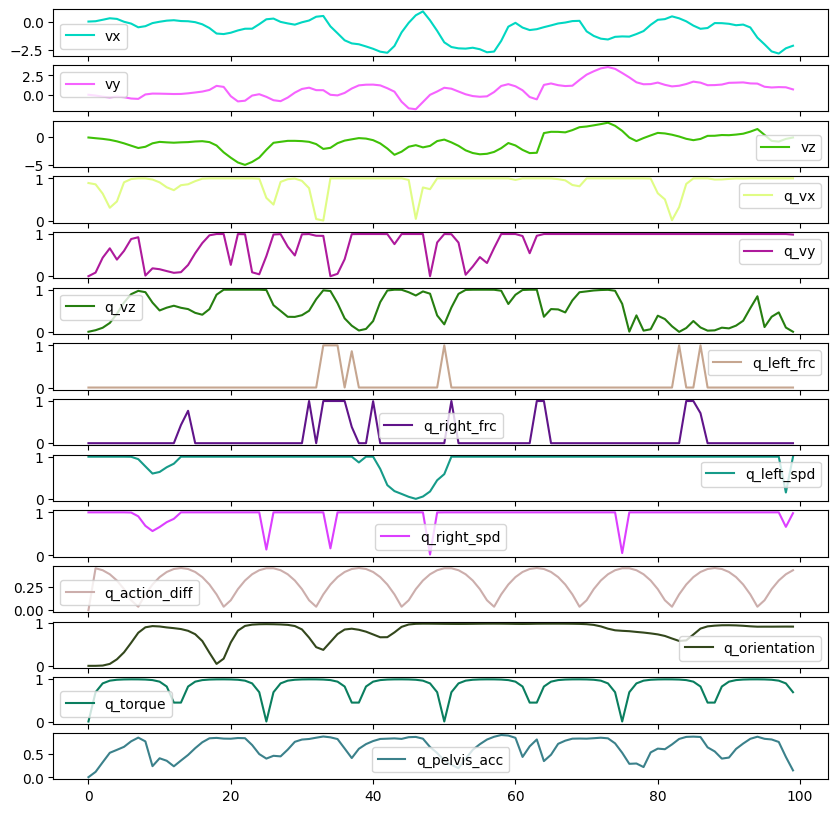

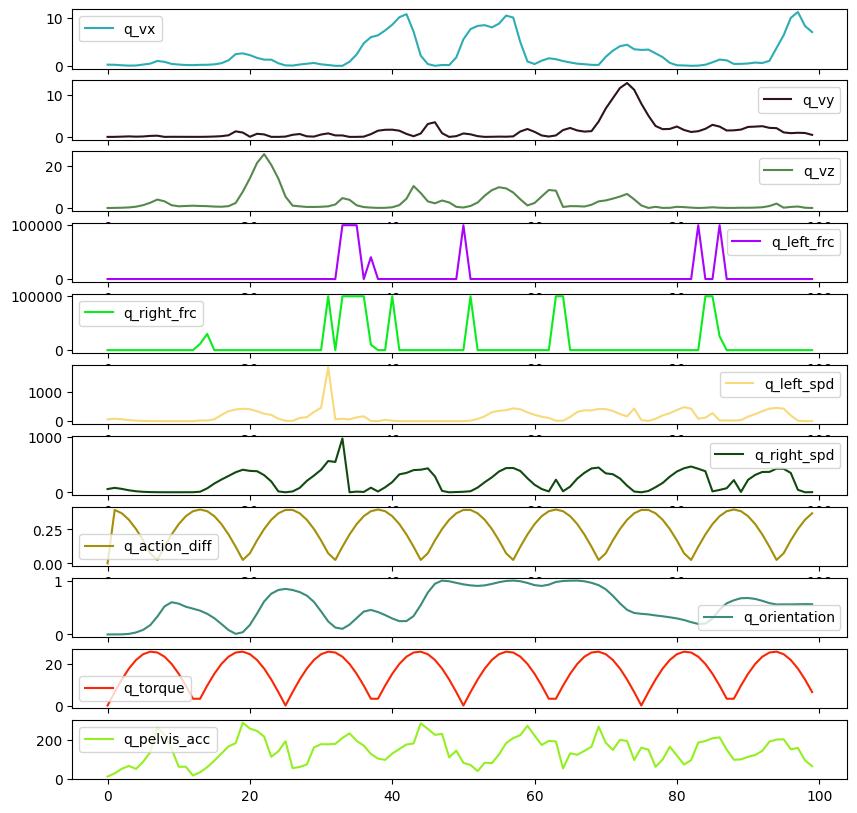

In [ ]:
#show a video of 100steps of the environment and register some metrics 
env = CassieEnv(flattened)
env.reset()
env.render_mode = "rgb_array"
metrics = {}
frames = []
metrics["vx"] = []
metrics["vy"] = []
metrics["vz"] = []
exponents = {}
max_steps = 100
number_of_rounds = 4
print
for i in range(max_steps):
    action = np.sin(number_of_rounds*i/max_steps*2*np.pi+phases)*np.array(list(c.actuator_ranges.values()))[:,1]
    observation, reward, terminated, _, _ = env.step(action)
    frames.append(env.render())
    metrics["vz"] .append( env.data.qvel[2])
    metrics["vx"] .append( env.data.qvel[0])
    metrics["vy"] .append( env.data.qvel[1])
    for exponent, value in env.exponents.items():
        if exponent not in exponents.keys():
            exponents[exponent] = [value]
        else:
            exponents[exponent].append(value)
    for metric,value in env.used_quantities.items():
        if metric not in metrics.keys():
            metrics[metric] = [value]
        else:
            metrics[metric].append(value)
env.close()
#save video 
media.show_video( frames, fps=fps)
#plot the metrics stacked in a vertical way in multiple subplots
import matplotlib.pyplot as plt
fig, axs = plt.subplots(len(metrics.keys()), 1, figsize=(10, 10))
for i, metric in enumerate(metrics.keys()):
    #choose a random color for the plot 
    s = np.random.rand(3,)

    axs[i].plot(metrics[metric], color=s)
    axs[i].legend([metric])

plt.show()


#do the same thing for the exponents
fig, axs = plt.subplots(len(exponents.keys()), 1, figsize=(10, 10))
for i, metric in enumerate(exponents.keys()):
    #choose a random color for the plot 
    s = np.random.rand(3,)

    axs[i].plot(np.clip(exponents[metric],0,100000), color=s)
    axs[i].legend([metric])

plt.show()



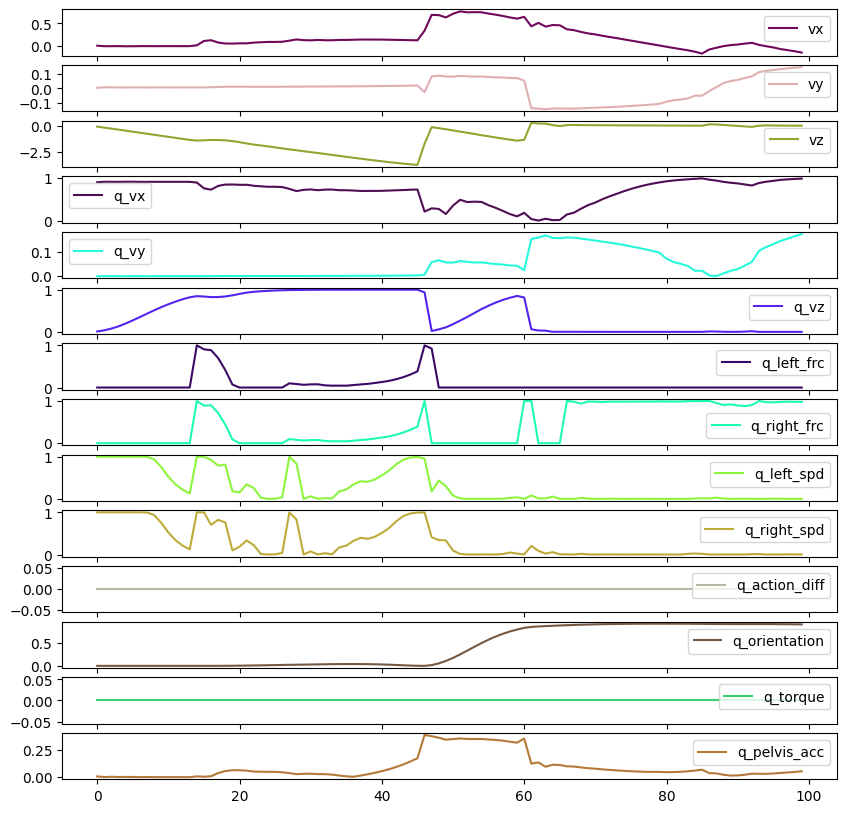

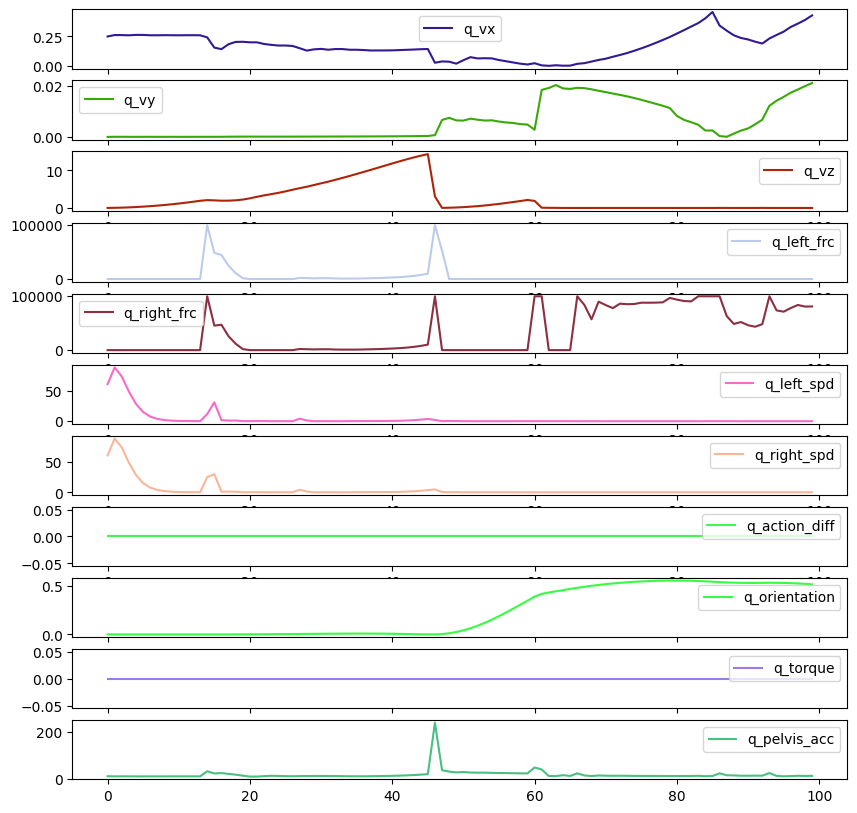

In [ ]:
#show a video of 100steps of the environment and register some metrics 
env = CassieEnv(flattened)
env.reset()
env.render_mode = "rgb_array"
metrics = {}
frames = []
metrics["vx"] = []
metrics["vy"] = []
metrics["vz"] = []
exponents = {}
max_steps = 100
number_of_rounds = 4
print
for i in range(max_steps):
    action = np.zeros(10)
    observation, reward, terminated, _, _ = env.step(action)
    frames.append(env.render())
    metrics["vz"] .append( env.data.qvel[2])
    metrics["vx"] .append( env.data.qvel[0])
    metrics["vy"] .append( env.data.qvel[1])
    for exponent, value in env.exponents.items():
        if exponent not in exponents.keys():
            exponents[exponent] = [value]
        else:
            exponents[exponent].append(value)
    for metric,value in env.used_quantities.items():
        if metric not in metrics.keys():
            metrics[metric] = [value]
        else:
            metrics[metric].append(value)
env.close()
#save video 
media.show_video( frames, fps=fps)
#plot the metrics stacked in a vertical way in multiple subplots
import matplotlib.pyplot as plt
fig, axs = plt.subplots(len(metrics.keys()), 1, figsize=(10, 10))
for i, metric in enumerate(metrics.keys()):
    #choose a random color for the plot 
    s = np.random.rand(3,)

    axs[i].plot(metrics[metric], color=s)
    axs[i].legend([metric])

plt.show()


#do the same thing for the exponents
fig, axs = plt.subplots(len(exponents.keys()), 1, figsize=(10, 10))
for i, metric in enumerate(exponents.keys()):
    #choose a random color for the plot 
    s = np.random.rand(3,)

    axs[i].plot(np.clip(exponents[metric],0,100000), color=s)
    axs[i].legend([metric])

plt.show()



In [ ]:
# trainer = PPOTrainer(env = 'cassie-v0',config = flattened)